# Unit 5 - Financial Planning

In [ ]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [ ]:
# Load .env enviroment variables
load_dotenv()

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [ ]:
# Set current amount of crypto assets
#Create two variables called my_btc and my_eth. Set them equal to 1.2 and 5.3
my_btc = 5.3
my_eth = 1.2

In [ ]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

# Add format specifier to request url
#btc_url = btc_url + "?format=json"
#eth_url = eth_url + "?format=json"

In [ ]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()
print(json.dumps(btc_data, indent=4))

# Fetch current ETH price
eth_data = requests.get(eth_url).json()
print(json.dumps(eth_data, indent=4))

In [ ]:
# Compute current value of my crpto
my_btc_value = my_btc * btc_data["data"]["1"]["quotes"]["USD"]["price"]
my_eth_value = my_eth * eth_data["data"]["1027"]["quotes"]["USD"]["price"]
crypto = my_btc_value + my_eth_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [ ]:
# Set current amount of shares
#Create two variables named my_agg and my_spy and set them equal to 200 and 50, respectively.
my_agg = 200
my_spy = 50

In [ ]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [ ]:
# Format current date as ISO format
today = pd.Timestamp("2020-07-14", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
df_portfolio

In [ ]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

In [ ]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price
shares = my_agg_value + my_spy_value

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

### Savings Health Analysis

In [ ]:
# Set monthly household income
# Set the average household income for each member of the credit union is $12,000.
monthly_income = 12000

# Consolidate financial assets data
total_crypto = crypto
total_shares = shares
l = {"amount":[total_crypto, total_shares]}

# Create savings DataFrame
df_savings = pd.DataFrame(l,index=["Crypto", "Shares"])

# Display savings DataFrame
display(df_savings)

In [ ]:
# Plot savings pie chart
df_savings.plot(kind="pie", y="amount")

In [ ]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto + shares

# Validate saving health
#Use if conditional statements to validate if the current savings are enough for an emergency fund. An ideal emergency fund should be equal to three times your monthly income.
if (total_savings > monthly_income):
    print ("Congratulations! You have enough emergency fund")

## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [ ]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [ ]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
df_stock_data.head()

In [ ]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_forcast = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = 500,
    num_trading_days = 252*30)
   

In [ ]:
# Printing the simulation input data
MC_forcast.portfolio_data.head()

In [128]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_forcast.calc_cumulative_return()

Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\alyza\week5_api\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999256,1.009109,1.001796,1.001056,1.003495,1.001501,0.998848,0.995752,1.012682,0.998730,...,0.993408,0.999358,1.003581,1.004656,0.995493,0.994180,0.995957,0.995677,0.999730,0.998394
2,0.998351,1.002406,1.004650,1.000634,1.007440,1.006943,0.997001,1.002221,1.008800,1.001266,...,0.993059,0.999541,1.012574,0.998946,0.994984,0.991566,1.001921,0.997782,1.008335,1.006390
3,0.996879,1.010152,1.005421,1.001617,1.006371,1.009122,0.999966,1.007887,1.009432,1.007260,...,0.994437,1.002772,1.014128,0.994760,0.994270,1.000664,1.005573,0.996887,1.005402,1.010035
4,1.002045,1.010157,1.006505,1.001262,1.006525,1.002258,1.004187,1.006151,1.013510,1.010987,...,1.000179,1.005608,1.015698,0.991871,0.994782,1.006047,1.005215,0.994211,1.005646,1.007236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,29.845176,36.791363,49.576320,52.022388,26.672415,36.425140,36.575965,53.947082,79.073729,32.030041,...,44.068618,57.742342,29.086575,50.787482,42.588913,29.396525,55.464308,24.654526,52.644733,17.982983
7557,29.694842,37.003547,49.345243,52.243105,26.780278,36.624049,36.365735,54.050685,79.216218,32.078056,...,43.858386,57.547611,29.292382,50.495362,42.954144,29.422203,55.345412,24.696761,52.827519,17.967719
7558,29.709040,37.057669,49.323825,52.500422,26.781092,36.469737,36.523306,53.958861,80.445975,32.001822,...,44.105007,57.146939,29.307474,50.642008,42.976132,29.171745,55.289516,24.670706,52.623381,18.018472
7559,29.598503,37.067692,49.447829,52.786312,26.881317,36.547516,36.473778,54.450156,80.288398,32.227620,...,44.261006,57.090587,29.168425,50.484594,42.829806,29.051894,55.189289,24.608798,52.715221,18.074461


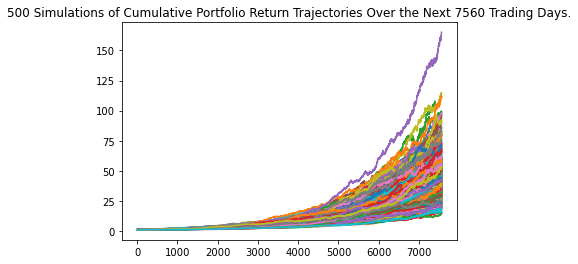

In [129]:
# Plot simulation outcomes
line_plot = MC_forcast.plot_simulation()

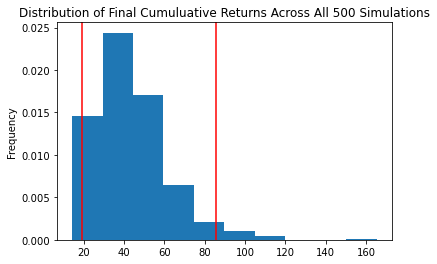

In [130]:
# Plot probability distribution and confidence intervals
dist_plot = MC_forcast.plot_distribution()

### Retirement Analysis

In [131]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_forcast.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             43.614025
std              18.215029
min              14.338111
25%              30.964459
50%              40.468302
75%              52.703284
max             165.173184
95% CI Lower     19.194391
95% CI Upper     85.706532
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [135]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
lower_confidence_interval = round(tbl[8]*20000,2)
upper_confidence_interval = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${lower_confidence_interval} and ${upper_confidence_interval}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $383887.81 and $1714130.64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [136]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
lower_confidence_interval = round(tbl[8]*30000,2)
upper_confidence_interval = round(tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${lower_confidence_interval} and ${upper_confidence_interval}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $575831.72 and $2571195.96


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [137]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_forcast = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = 500,
    num_trading_days = 252*5)

In [138]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_forcast.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\alyza\week5_api\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999033,1.002364,0.999956,1.000645,0.999984,1.000904,0.997037,0.993982,0.996980,0.993581,...,1.000280,1.000659,0.999877,1.006251,0.999970,1.002753,1.003125,0.998116,1.003997,1.002062
2,0.997093,1.013654,0.999080,1.000553,0.997529,0.998529,1.001057,0.987720,1.001701,1.001834,...,0.992162,1.002500,1.006113,1.008016,0.994339,0.996409,1.008526,0.995777,1.012595,1.001571
3,1.001295,1.010117,0.990705,1.003927,0.997482,0.999654,1.002852,0.991248,0.998725,1.003578,...,0.999064,0.999145,1.006333,1.007557,0.993696,0.995974,1.012804,0.998462,1.010769,1.004766
4,1.005514,1.010202,0.994356,1.000857,0.990753,0.990215,1.003386,0.986133,0.991988,1.006116,...,0.994860,0.995046,1.009840,1.000112,0.989804,0.997655,1.003283,0.991752,1.016837,0.999846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.159466,1.835125,1.963851,1.735425,1.815840,1.777430,1.901810,1.828724,2.127814,1.705366,...,1.839107,1.639230,1.645384,1.993178,1.884954,1.950812,1.870430,1.985604,2.252975,2.126108
1257,2.161289,1.830412,1.962562,1.730996,1.821870,1.786604,1.908860,1.828293,2.132349,1.711084,...,1.844139,1.642751,1.640966,1.995627,1.888214,1.941606,1.877231,1.968287,2.267960,2.126308
1258,2.147530,1.820646,1.971583,1.733743,1.825868,1.797933,1.927349,1.842568,2.138279,1.722019,...,1.842147,1.639973,1.645383,2.009214,1.876983,1.949926,1.868116,1.975547,2.270499,2.109033
1259,2.141860,1.816905,1.974246,1.725927,1.819363,1.796128,1.946118,1.844437,2.138903,1.740430,...,1.843293,1.637054,1.638632,2.005880,1.874872,1.959737,1.862199,1.971895,2.271277,2.097752


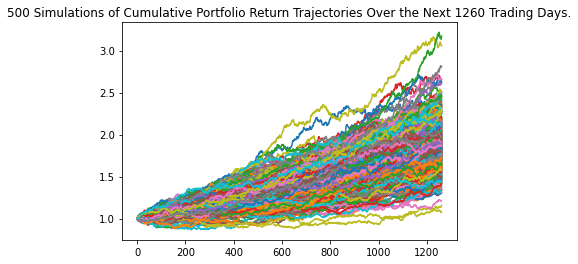

In [139]:
# Plot simulation outcomes
line_plot = MC_forcast.plot_simulation()

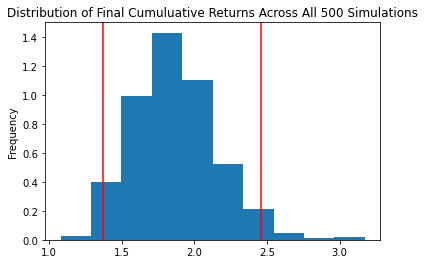

In [140]:
# Plot probability distribution and confidence intervals
dist_plot = MC_forcast.plot_distribution()

In [141]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_five = MC_forcast.summarize_cumulative_return()

# Print summary statistics
print(tbl_five)

count           500.000000
mean              1.866925
std               0.287501
min               1.080290
25%               1.657216
50%               1.849690
75%               2.033653
max               3.173935
95% CI Lower      1.373617
95% CI Upper      2.462322
Name: 1260, dtype: float64


In [ ]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl[8]*60000,2)
ci_upper_five = round(tbl[9]*60000,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [143]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_forcast = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = 500,
    num_trading_days = 252*10)

In [144]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_forcast.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\alyza\week5_api\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001361,1.001065,0.998232,1.000865,0.999984,0.994933,0.998362,0.999253,1.001521,1.007357,...,1.002803,1.003440,0.998007,0.988503,1.002661,0.998269,0.997250,1.003127,0.999117,1.005054
2,1.009425,1.003963,0.992221,0.999930,1.002905,0.999292,1.003548,1.001583,1.000206,1.004166,...,1.011025,1.011348,0.995624,0.992453,0.999154,1.002165,0.998089,1.010660,1.007214,1.002798
3,1.004889,1.004160,0.991395,0.998239,0.997896,0.999266,1.002691,1.001798,1.004726,1.017464,...,1.017109,1.012151,0.994405,0.999738,0.993928,1.004220,1.001503,1.010912,1.003307,1.008814
4,1.001513,1.004089,0.988406,0.996553,0.999526,1.005373,1.002345,1.000439,0.997249,1.014036,...,1.020884,1.024303,0.988840,0.994016,0.994382,1.000463,1.009207,1.007313,1.010562,1.008792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,4.555727,3.706898,3.596048,2.548019,3.253806,3.229313,3.752213,3.532065,3.579856,4.302923,...,2.248567,3.196303,4.100684,4.528432,3.978033,2.544180,2.446858,3.789131,3.837737,3.961053
2517,4.516170,3.721868,3.609627,2.531485,3.262275,3.237354,3.772287,3.523159,3.586491,4.299268,...,2.246478,3.202501,4.129920,4.530382,3.960021,2.551639,2.458640,3.799891,3.819854,3.995450
2518,4.522824,3.694402,3.615497,2.548164,3.279209,3.239206,3.778175,3.522710,3.570584,4.307676,...,2.239396,3.198864,4.113901,4.527414,3.953546,2.557929,2.460274,3.787865,3.821854,3.981156
2519,4.527616,3.664608,3.618037,2.556211,3.283501,3.240218,3.786898,3.539227,3.564326,4.344950,...,2.246081,3.179342,4.134122,4.504302,3.955607,2.559366,2.476605,3.818215,3.837376,3.978886


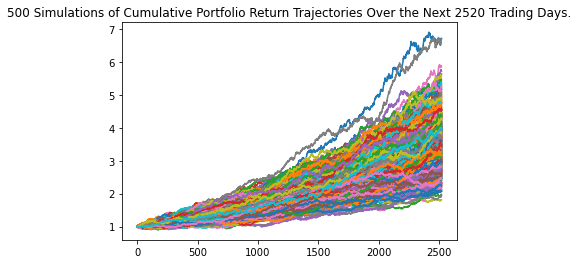

In [145]:
# Plot simulation outcomes
line_plot = MC_forcast.plot_simulation()

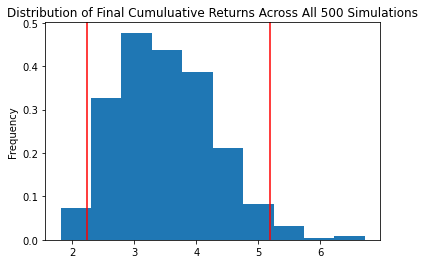

In [146]:
# Plot probability distribution and confidence intervals
dist_plot = MC_forcast.plot_distribution()

In [147]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ten = MC_forcast.summarize_cumulative_return()

# Print summary statistics
print(tbl_ten)

count           500.000000
mean              3.508758
std               0.772045
min               1.812267
25%               2.941347
50%               3.459574
75%               3.990410
max               6.715698
95% CI Lower      2.243926
95% CI Upper      5.186847
Name: 2520, dtype: float64


In [148]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl[8]*60000,2)
ci_upper_ten = round(tbl[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $1151663.43 and $5142391.93
